# Context of Data
Company - UK-based and registered non-store online retail

Products for selling - Mainly all-occasion gifts

Customers - Most are wholesalers (local or international)

Transactions Period - **1st Dec 2010 - 9th Dec 2011 (One year)**

# Data Usage:
 
**The project aims to unlock insights and profits through the analysis of e-commerce sales data. It involves exploring a dataset containing information about sales transactions made through an e-commerce platform.**


**By analyzing this data, one can gain valuable insights into sales trends, top-selling products, geographical patterns, and fulfillment methods, among other aspects.**

**The ultimate goal is to make data-driven decisions to optimize sales and improve overall business performance.**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
import pandas as pd

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [3]:
# specify encoding to deal with different formats
df = pd.read_csv('data.csv', encoding = 'ISO-8859-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# change the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [6]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Cleaning 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


## Check missing values for each column 

In [8]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [9]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [10]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [11]:
# change description - UPPER case to LOWER case
df['description'] = df.description.str.lower()

In [12]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Remove rows with missing values

In [13]:
# df_new without missing values
df_new = df.dropna()

In [14]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [16]:
# change columns tyoe - String to Int type 
df_new['cust_id'] = df_new['cust_id'].astype('int64')

In [17]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  int64         
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [19]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


## Remove Quantity with negative values

In [20]:
df_new = df_new[df_new.quantity > 0]

In [21]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


## Add the column - amount_spent

In [22]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [23]:
# rearrange all the columns for easy reference
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

## Add the columns - Month, Day and Hour for the invoice

In [24]:
df_new.insert(loc=2, column='year_month', value=df_new['invoice_date'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [25]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


# Exploratory Data Analysis (EDA)

## How many orders made by the customers?

In [26]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


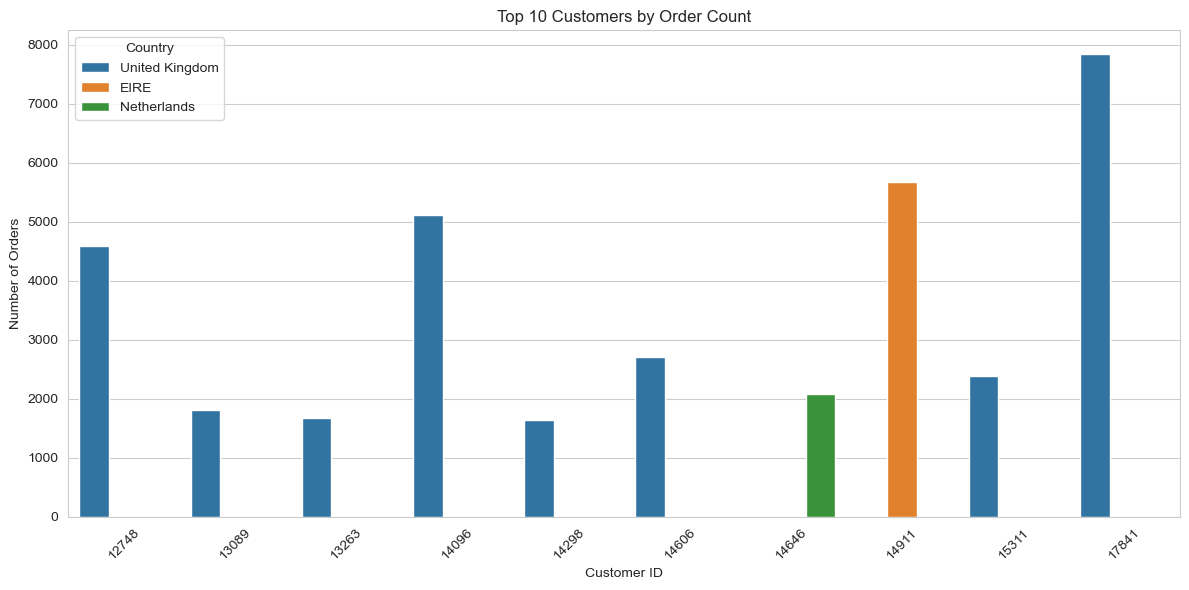

In [27]:
# Grouping data
orders = df_new.groupby(by=['cust_id', 'country'], as_index=False)['invoice_num'].count()

# Sorting by order count
orders_sorted = orders.sort_values(by='invoice_num', ascending=False)

# Top 10 customers by order count
top_customers = orders_sorted.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='cust_id', y='invoice_num', hue='country', data=top_customers)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Top 10 Customers by Order Count')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


**I used seaborn's barplot to create a bar chart which allows us to compare the number of orders for the top 10 customers.
Each bar is segmented by country, with different colors representing different countries.
I also added rotation to the x-axis labels for better readability since customer IDs tend to be long.**






### Check TOP 5 most number of orders

In [28]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


## How much money spent by the customers?

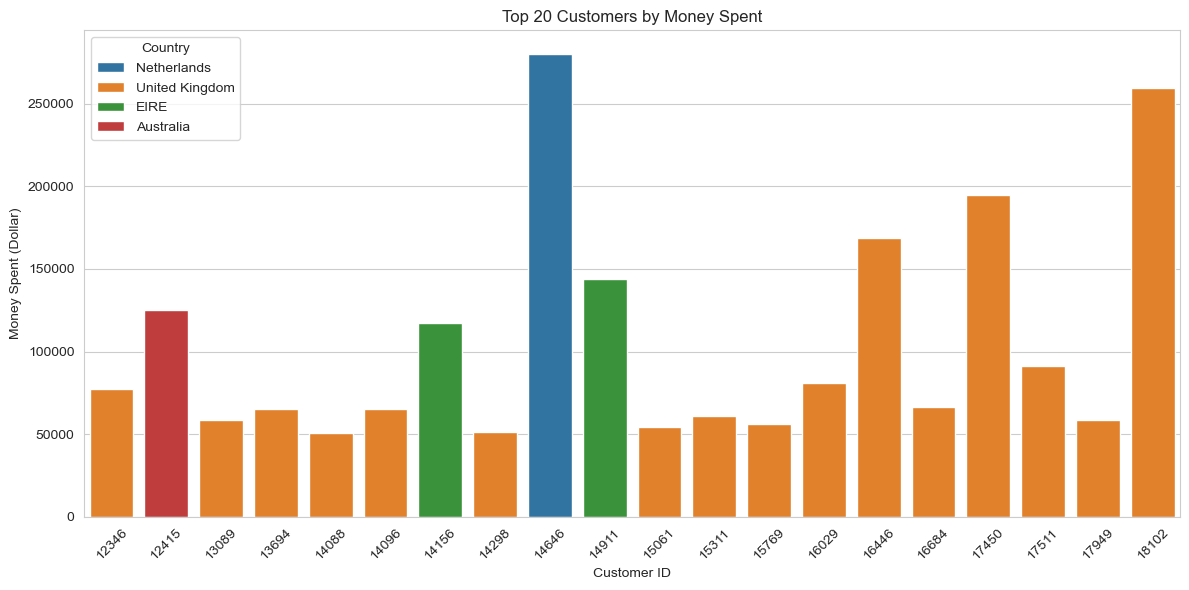

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_new' contains your DataFrame

# Grouping data
money_spent = df_new.groupby(by=['cust_id', 'country'], as_index=False)['amount_spent'].sum()

# Sorting data by amount spent
money_spent_sorted = money_spent.sort_values(by='amount_spent', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='cust_id', y='amount_spent', hue='country', data=money_spent_sorted.head(20), dodge=False)
plt.xlabel('Customer ID')
plt.ylabel('Money Spent (Dollar)')
plt.title('Top 20 Customers by Money Spent')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


. I used a bar plot to visualize the money spent by the top 20 customers, where each bar represents a customer.

. The bars are segmented by country, with different colors indicating the country of the customer.

. I sorted the data by the amount spent to focus on the top spending customers.

. I added rotation to the x-axis labels for better readability since customer IDs tend to be long.

. By focusing on the top spending customers, this visualization provides insights into the highest revenue-generating customers   and their respective countries.


### Check TOP 5 highest money spent

In [30]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


# Discover patterns for Number of Orders
### How many orders (per month)

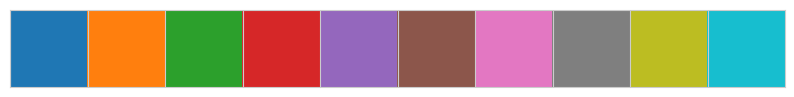

In [31]:
# color available
sns.palplot(color)

In [32]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


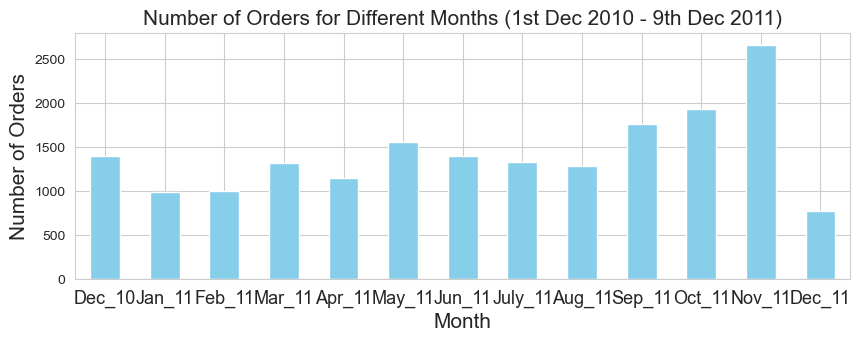

In [33]:
# Grouping data and plotting
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(10,3.2))

# Customizing labels and title
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for Different Months (1st Dec 2010 - 9th Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)

plt.show()


The code first groups the data by the combination of 'invoice_num' and 'year_month' to count the unique occurrences of 'year_month' for each 'invoice_num'. Then it sorts the resulting Series by the index (which represents the months) and plots a bar chart using plot(kind='bar'). The bars will be colored sky blue.


These lines customize the labels and title of the plot to make it more informative and readable.
The x-axis label is set to 'Month' and the y-axis label to 'Number of Orders'.
The title of the plot is set to 'Number of Orders for Different Months (1st Dec 2010 - 9th Dec 2011)'.
The x-axis tick labels are manually set to represent the months from December 2010 to December 2011.


**Overall Interpretation**:

The bar chart shows the number of orders for each month from December 2010 to December 2011.
Each bar represents a month, and the height of the bar indicates the number of orders placed in that month.
By visualizing the order counts over time, this plot allows us to identify any trends or patterns in the ordering behavior of customers throughout the specified period.

## How many orders (per day)?

In [34]:
df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

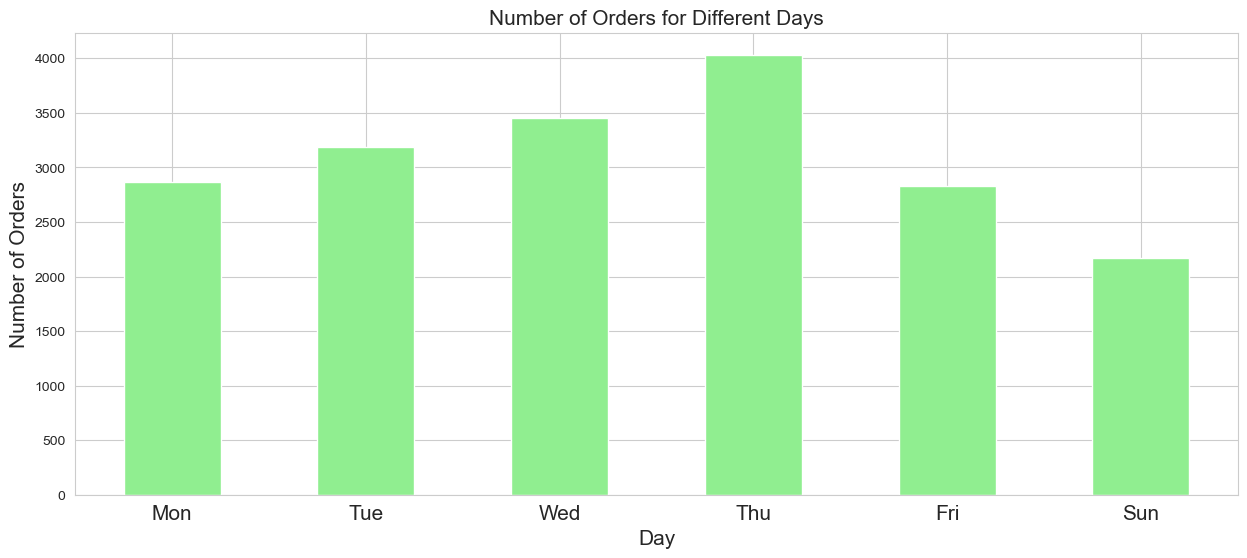

In [35]:
# Grouping data
order_counts_by_day = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()

# Plotting with color changed to 'lightgreen'
ax = order_counts_by_day.plot(kind='bar', color='lightgreen', figsize=(15, 6))

# Customizing labels and title
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of Orders for Different Days', fontsize=15)
ax.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun'), rotation='horizontal', fontsize=15)

plt.show()


Here, the data is grouped by the 'invoice_num' column, and then the unique days ('day') associated with each 'invoice_num' are counted. The resulting counts are sorted by the index (which represents the days of the week).

The code plots a bar chart using the plot function, specifying the kind of plot as 'bar'. The color of the bars is set to 'lightgreen', and the size of the figure is adjusted to (15, 6).

These lines customize the labels and title of the plot. The x-axis label is set to 'Day', the y-axis label to 'Number of Orders', and the title to 'Number of Orders for Different Days'. The x-axis tick labels are manually set to represent the days of the week ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun'), with rotation set to 'horizontal' and fontsize set to 15.

**Overall, the visualization provides insights into the distribution of orders across different days of the week, allowing for analysis of any patterns or trends in customer behavior related to ordering frequency throughout the week.**


 ## How many orders (per hour)?


In [36]:
# Explode the 'hour' column to transform array-like elements into separate rows
df_exploded = df_new.explode('hour')

# Grouping data and counting occurrences of each unique hour
hour_counts = df_exploded.groupby('invoice_num')['hour'].value_counts().sort_index()

# Remove the last element (if it's present) using iloc[:-1]
hour_counts = hour_counts.iloc[:-1]

# Print the result
print(hour_counts)


invoice_num  hour
536365       8        7
536366       8        2
536367       8       12
536368       8        4
536369       8        1
                     ..
581582       12       2
581583       12       2
581584       12       2
581585       12      21
581586       12       4
Name: hour, Length: 18536, dtype: int64


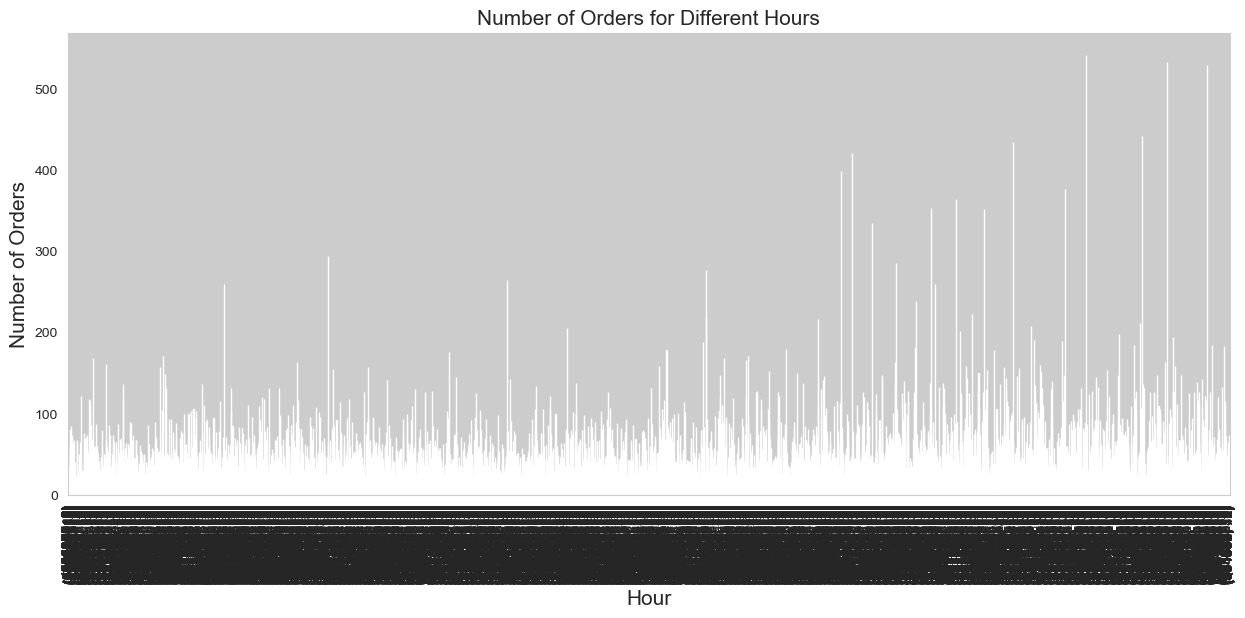

In [69]:
# Plotting
ax = hour_counts.plot(kind='bar', figsize=(15, 6))
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
plt.title('Number of Orders for Different Hours', fontsize=15)
plt.show()


# Discover patterns for Unit Price

In [51]:
df_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

**We see that there are unit price = 0 (FREE items)**

<span class="mark">There are some free items given to customers from time to time</span>.

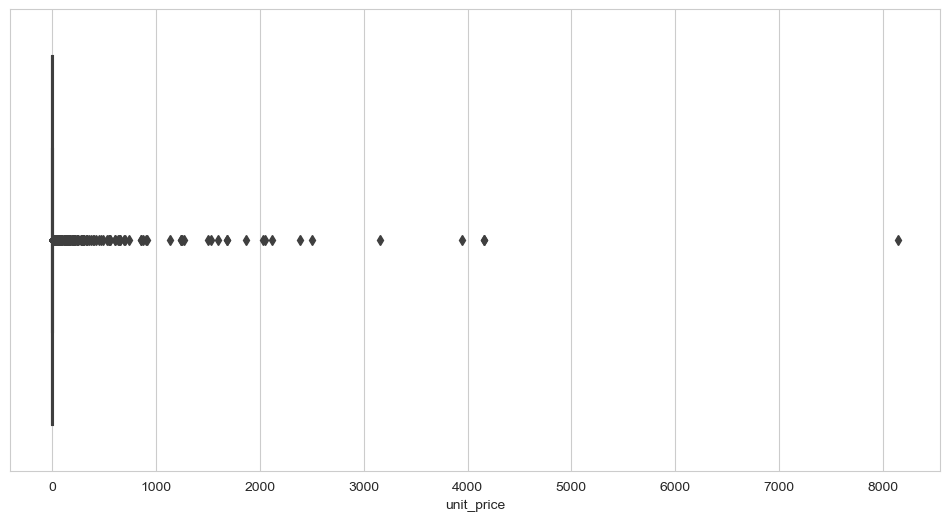

In [52]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

In [53]:
df_free = df_new[df_new.unit_price == 0]

In [54]:
df_free.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom


In [55]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

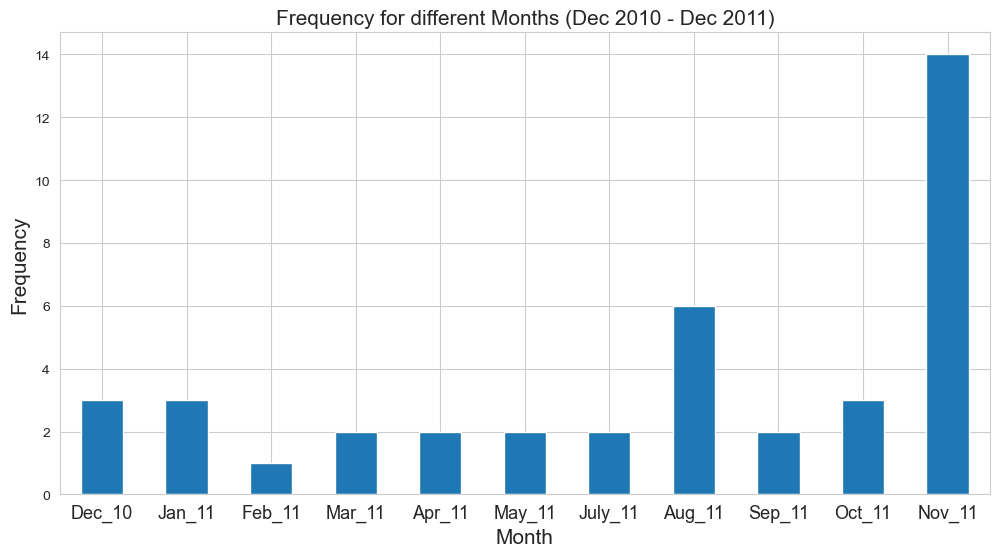

In [57]:
# Plotting
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color=color[0])
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11', 'Apr_11', 'May_11', 'July_11', 'Aug_11', 'Sep_11', 'Oct_11', 'Nov_11'), rotation='horizontal', fontsize=13)
plt.show()


**Not clear why there are FREE items given to certain customers**
- On average, the company <span class="mark">gave out 2-4 times FREE items</span> to customers <span class="mark">each month (Except in June 2011)</span>

# Discover patterns for each Country

In [58]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


## How many orders for each country?

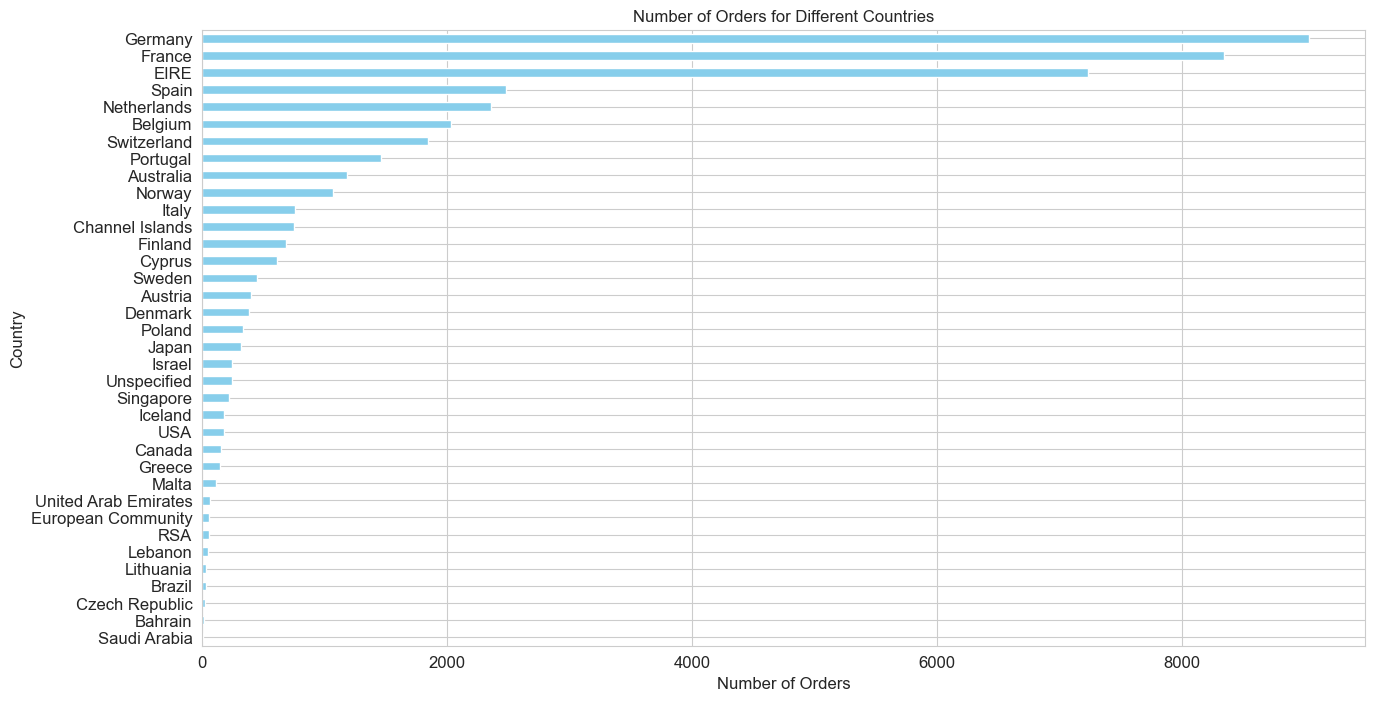

In [63]:
# Define a new color
new_color = 'skyblue'

# Plotting
plt.subplots(figsize=(15, 8))
group_country_orders.plot(kind='barh', fontsize=12, color=new_color)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for Different Countries', fontsize=12)
plt.show()


This code generates a horizontal bar plot showing the number of orders for different countries. Each country is represented on the y-axis, and the number of orders is represented on the x-axis. The color of the bars is defined by the color variable.







## How much money spent by each country?

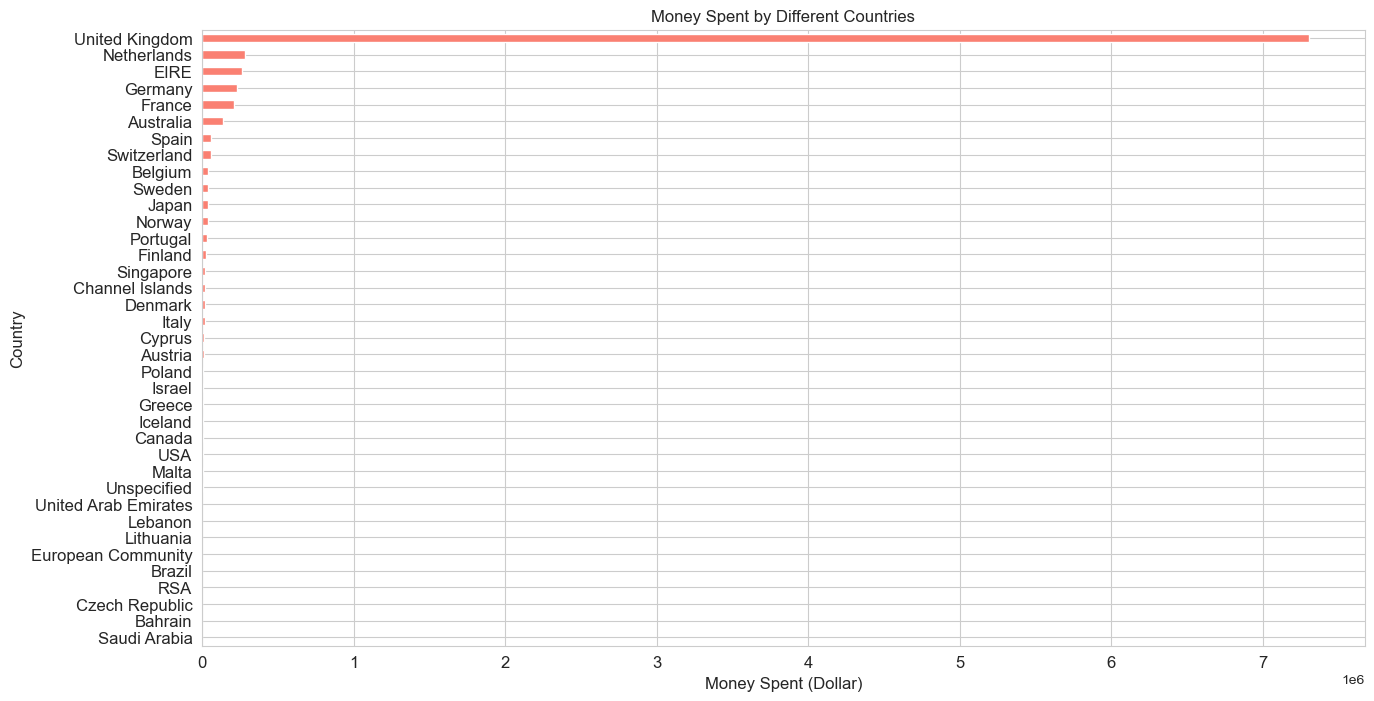

In [66]:
# Choose a different color (e.g., salmon)
bar_color = 'salmon'

# Plotting total money spent by each country (with UK)
plt.subplots(figsize=(15, 8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=bar_color)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by Different Countries', fontsize=12)
plt.show()


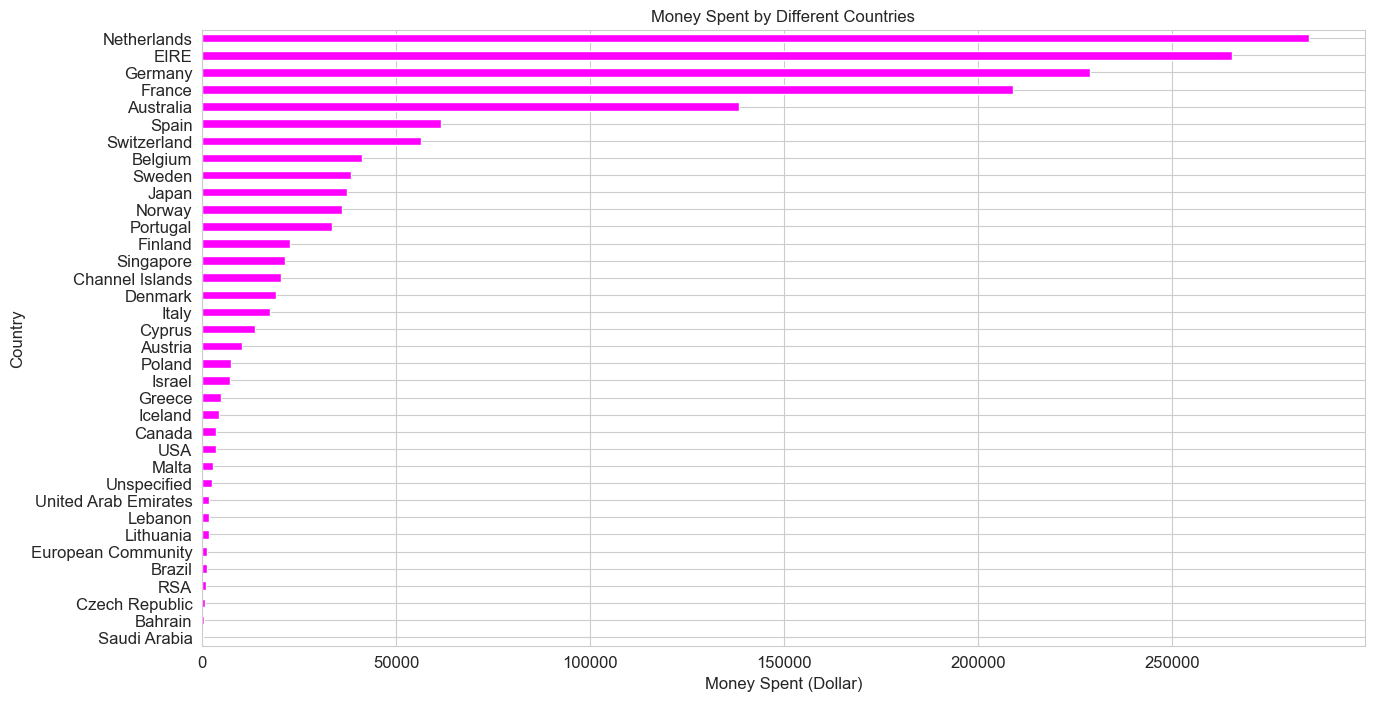

In [68]:

# Plotting total money spent by each country (without UK)
plt.subplots(figsize=(15, 8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color='magenta')  # Change color to 'magenta'
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by Different Countries', fontsize=12)
plt.show()


# Result from Exploratory Data Analysis (EDA)
 
1. **Top Customer by Order Count**: The **United Kingdom (UK)** is home to the customer with the highest number of orders.

2. **Highest Spender**: The customer who spent the most on purchases is from the **Netherlands**.

3. **Top Countries by Order Count**: The company receives the highest number of orders from customers in the UK, followed by      **Germany, France, Ireland , and Spain**.

3. **Top Countries by Spending**: Reflecting the high number of orders, customers in the UK spend the most on purchases, followed    by **Netherlands, Ireland (EIRE), Germany, and France**. 

4. **Sales Peaks**: November 2011 emerges as the month with the highest sales. However, the month with the lowest sales remains undetermined due to the dataset only covering transactions until 9th December 2011 in December.

5. **Transaction Trends**: No transactions were recorded on Saturdays between **1st December 2010 and 9th December 2011**.

      **November 2011 has the highest sales** 


6. **Order Trends by Day**: The number of orders tends to increase from Monday to Thursday before decreasing.

7. **Peak Ordering Time**: The company receives the highest number of orders at **12:00 pm**, suggesting a potential peak during   the lunch hours between **12:00 pm and 2:00 pm**.

8. **Occasional Free Items**: The company tends to offer free items with purchases on a monthly basis, excluding **June 2011**. 


   -  However, the specific factors influencing the distribution of these free items to particular customers remain unclear

## Conclusion:
**The United Kingdom has the highest number of orders, indicating a strong customer base in this region.
Despite the UK having the highest order count, the Netherlands stands out as the country with the highest spending customer. This suggests varying spending habits across different regions.**


**The UK, Germany, France, Ireland, and Spain are the top countries by order count, reflecting a widespread customer base.
Customers from the UK, Netherlands, Ireland (EIRE), Germany, and France contribute the most to sales revenue, highlighting key markets for the company.**



**November 2011 witnessed the highest sales volume, indicating potential seasonal peaks or promotional events driving increased purchases.
Saturdays showed no recorded transactions, which could be due to operational reasons or customer behavior patterns.**



**The number of orders tends to increase from Monday to Thursday before declining, suggesting a weekday shopping trend among customers.
Peak ordering time at 12:00 pm indicates potential lunchtime shopping behavior or promotional activities during that period.**

Overall, these conclusions provide valuable insights into customer behavior, regional sales performance, and promotional strategies, which can inform decision-making processes aimed at optimizing sales and marketing efforts in the e-commerce business. Further analysis and data collection may be necessary to delve deeper into specific factors influencing sales trends and customer preferences.





